<a href="https://colab.research.google.com/github/andresvillamayor/Dimensionalidad/blob/main/Parcial_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Parcial 1 : Andres Villamayor

## Tema 3  

### Implementacion t-SNE comparando con la recomendacion de ChatGPT
----


## Pasos a Seguir

- Importar las librerias Necesarias
- Cargar el Conjunto de datos
- Instanciar el modelo t-SNE
- Ajustar el Modelo a los Datos y Transformaciones
- Graficar los datos Transformados
- Calcular la metrica del valor dado por implentacion nuestra
- Calcular la metrica del valor de ChatGPT

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.spatial.distance import pdist
from scipy.stats import spearmanr
import numpy as np

In [3]:
# Cargar el conjunto de datos de votación
df_data = pd.read_excel('/content/drive/MyDrive/pca/resultados-2023-por-local.xlsx')

In [4]:
# Suponiendo que 'data' es tu DataFrame
df_data['candidatura'] = df_data['candidatura'].astype('category')
df_data['departamento'] = df_data['departamento'].astype('category')
df_data['distrito'] = df_data['distrito'].astype('category')
df_data['zona'] = df_data['zona'].astype('category')
df_data['local'] = df_data['local'].astype('category')

In [5]:
# Convertir las columnas categóricas a variables dummy
df_data = pd.get_dummies(df_data, columns=['candidatura', 'departamento', 'distrito', 'zona', 'local'])
columnas_tsne = df_data.columns

In [6]:
# Seleccionar las columnas y manejar valores nulos si es necesario
X = df_data[columnas_tsne].fillna(0)

In [7]:
# Aplicar t-SNE con dos componentes (puedes ajustar según tus necesidades)
tsne = TSNE(n_components=2, random_state=42, learning_rate= 10, perplexity=30)
X_tsne = tsne.fit_transform(X)

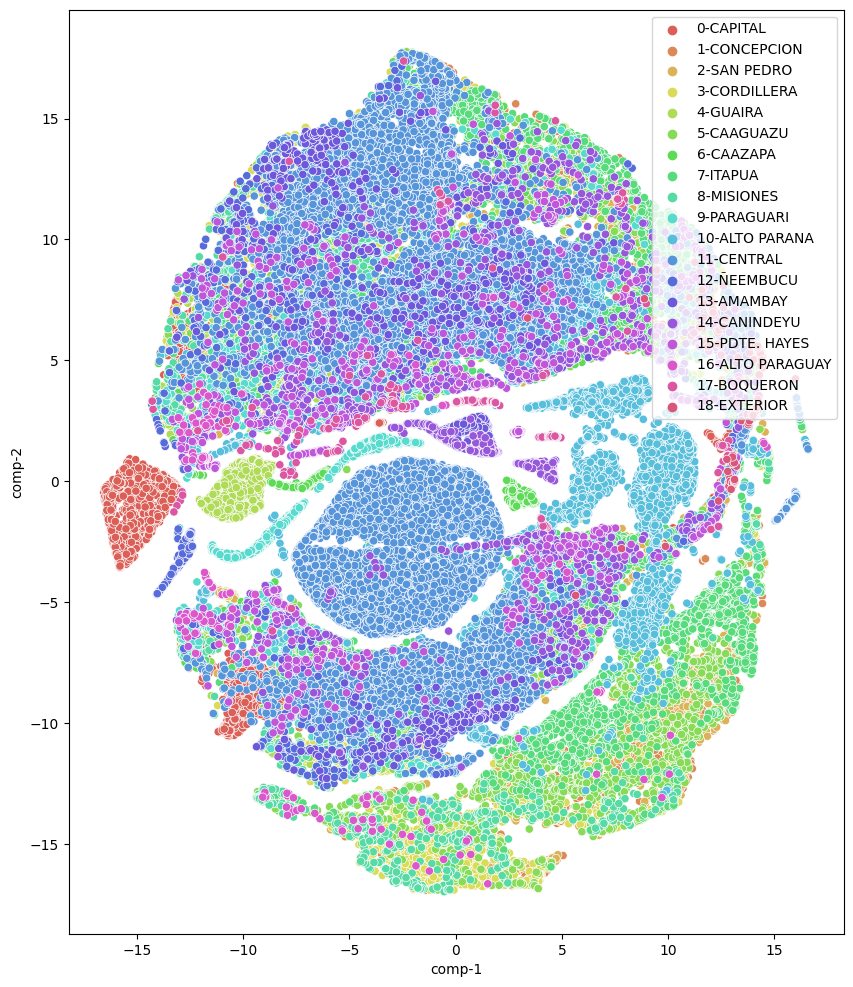

In [8]:
#Graficando con variable departamento
data_2 = pd.read_excel('/content/drive/MyDrive/pca/resultados-2023-por-local.xlsx')
y=data_2['departamento']
df = pd.DataFrame()
df["y"] = y
df["comp-1"] = X_tsne[:,0]
df["comp-2"] = X_tsne[:,1]
plt.figure( figsize = (10,12))
sns.scatterplot(x="comp-1", y="comp-2",hue=df.y.tolist(),
                palette=sns.color_palette("hls", 19),
                data=df)
plt.show()

In [9]:
# Relacion del ChatGPT
tsne_gpt = TSNE(n_components=2, random_state=42)
X_tsne_gpt = tsne_gpt.fit_transform(X)

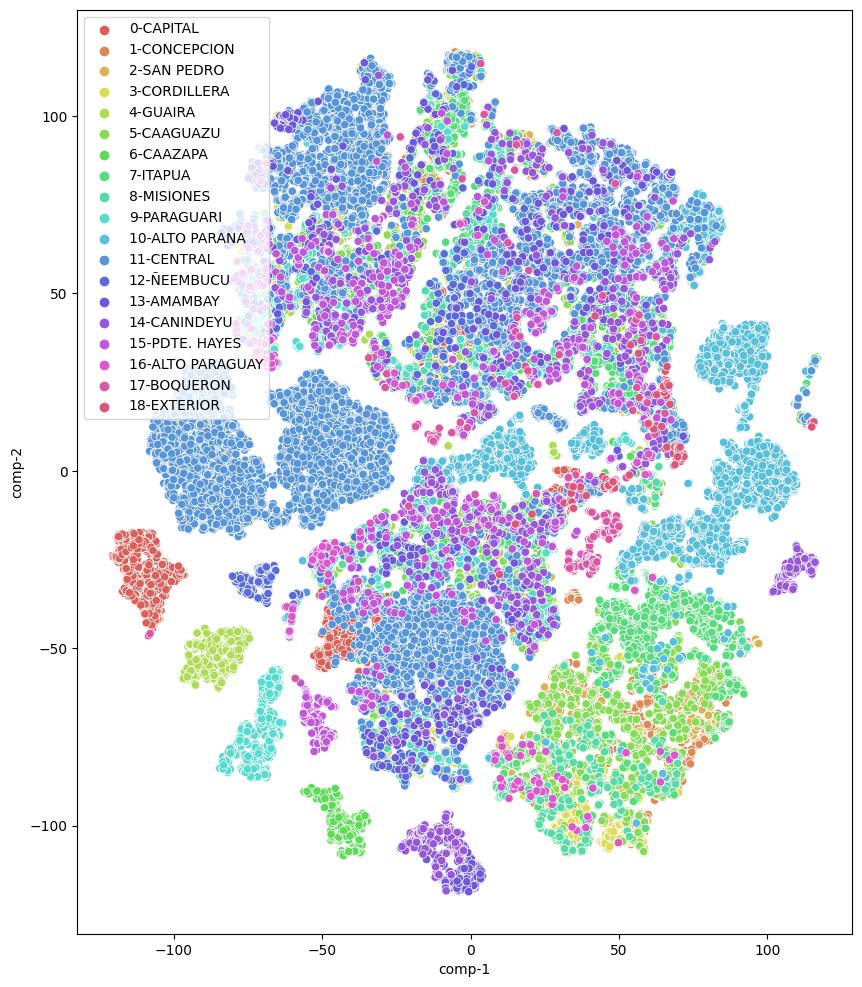

In [10]:
#Graficando con variable departamento
##data_2 = pd.read_excel('/content/drive/MyDrive/pca/resultados-2023-por-local.xlsx')
y=data_2['departamento']
df = pd.DataFrame()
df["y"] = y
df["comp-1"] = X_tsne_gpt[:,0]
df["comp-2"] = X_tsne_gpt[:,1]
plt.figure( figsize = (10,12))
sns.scatterplot(x="comp-1", y="comp-2",hue=df.y.tolist(),
                palette=sns.color_palette("hls", 19),
                data=df)
plt.show()

In [ ]:
dist_original = pdist(X)
dist_tsne = (X_tsne)
correlation, _ = spearmanr(dist_original,dist_tsne)
print(f'Correlación de Spearman entre distancias originales y t-SNE reducido :{correlation}')

In [ ]:
dist_original = pdist(X)
dist_tsne_gpt = (X_tsne_gpt)
correlation, _ = spearmanr(dist_original,dist_tsne_gpt)
print(f'Correlación de Spearman entre distancias originales y t-SNE gpt reducido :{correlation}')